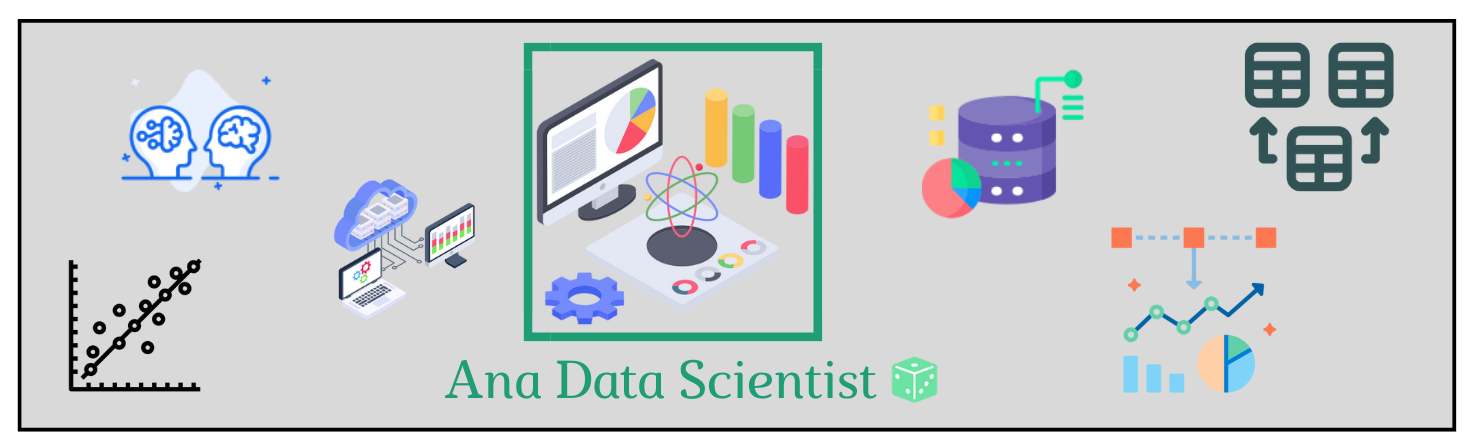

<h1 style="text-align: center; color: #1f9d76"> Projeto Previsão do Preço da Casa (House Price Prediction)</h1>

<div class="alert alert-block alert-info"><font size="3">
    <b> Project Description:</font><font size="3"></b> O objetivo desse projeto <strong>Previsão do Preço da Casas</strong> é prever o preço da casa baseada nas suas características. Os dados utilizados para o desenvolvimento desse projeto é da plataforma Kaggle (plataforma de competição). </font> 
</div>

<font size="5"><a id="sumario"><bold>Summary</bold></a></font>
***
>1. [Introdução ao Modelo](#ses1)
>2. [Importação das Bibliotecas](#ses2)
>3. [Carregando os Dados](#ses3)
>4. [Preparação dos Dados](#ses4)
>5. [Análise Exploratória](#ses5)
>6. [Normalização dos Dados](#ses6)
>7. [Encoding dos Dados](#ses7)
>8. [Modelo Regressão Linear](#ses8)
>9. [Seleção de Features](#ses9)
>10. [Referências](#ses10)

<h1 style="text-align:center;" ><a id="ses1">Introdução ao Modelo Regressão Linear  </a></h1>


[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Section Description</h3>

Nesta seção vou fazer uma breve introdução ao modelo de machine learning que vou utilizar para o desenvolvimento desse projeto.

### Introdução ao Modelo de Regressão Linear 

O Modelo de Regressão Linear é um algoritmo de machine learning baseado no aprendizado supervisionado, é um modelo simples e fornecem uma fórmula matemática fácil de interpretar. É um algoritmo usado para prever o valor de uma variável (variável dependente)  com base em outras variáveis (variáveis independentes). 

A regressão linear estima os coeficientes da equação linear, envolvendo uma ou mais variáveis independentes que melhor preveem o valor da variável dependente. A regressão linear se ajusta a uma linha reta ou superficial que minimiza as discrepâncias entre os valores de saída previstos e reais. Há calculadoras de regressão linear simples que usam um método dos mínimos quadrados para descobrir a linha de melhor ajuste para um conjunto de dados emparelhados. Em seguida, o valor de X (variável dependente) de Y (variável independente) é estimado. 

A regressão linear pode ser aplicada a diversas áreas de estudo empresarial e acadêmico. Como por exemplo; a regressão linear pode ser aplicada em finança para entender a relação entre o preço das ações de uma empresa e seus ganhos, ou para prever o valor futuro de uma moeda com base em seu desempenho passado.

<h1 style="text-align:center;" ><a id="ses2">Imports</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Section Description</h3> 

Importações das bibliotecas utilizadas para o desenvolvimento desse notebook e algumas configurações de saídas de códigos.

In [1]:
# Imports

import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import r_regression, SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Versão da Linguagem Python

from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())
print("")

# Versões de pacotes utilizados 

%reload_ext watermark
%watermark -a "Ana Data Scientist" --iversions

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.8

Author: Ana Data Scientist

missingno : 0.5.1
matplotlib: 3.6.2
numpy     : 1.22.4
seaborn   : 0.12.1
pandas    : 1.5.2



In [3]:
# Para ignorar mensagens de alertas 

warnings.filterwarnings('ignore')

%config Completer.use_jedi = False

# Visualizar todas as colunas do dataset

pd.set_option('display.max_columns', None)

<h1 style="text-align:center;" ><a id="ses3">Carregamento dos dados</a></h1>

[VOLTAR](#sumario)

In [4]:
# Dataset de train

import os
os.chdir('C:\\Projetos\\House_Price_Predicition\\01-CodigoFonte\\00-DataSets')

train = pd.read_csv('train.csv')

# Dataset test

test = pd.read_csv('test.csv')

In [5]:
# Criando uma coluna para auxiliar na separação futura de treino e teste do modelo

train['train'] = 'Train'
test['test'] = 'Test'

In [6]:
# Meclando os dados em um só dataset

price_house_all = pd.concat([train, test])

In [7]:
# Visualizando as primeiras linhas 

price_house_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train,test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,Train,NaN
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,Train,NaN
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,Train,NaN
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,Train,NaN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,Train,NaN


<h1 style="text-align:center;" ><a id="ses4">Preparação dos Dados</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

O objetivo dessa etapa é fazer as transformações necessárias e limpeza dos dados que serão usados para treinar o modelo, como por exemplo:
* tratar valores ausentes
* remover dados  duplicados
* corrigir formatos incorretos

Entre outras tranformações e limpezas que podem ser realizadas e assim garantindo gerar resultados mais precisos. 

In [8]:
# Dimensão dos dados

print(f'''
Dataset de treino: {train.shape[0]} linhas e {train.shape[1]} colunas.

Dataset de test: {test.shape[0]} linhas e {test.shape[1]} colunas.''')


Dataset de treino: 1460 linhas e 82 colunas.

Dataset de test: 1459 linhas e 81 colunas.


In [9]:
# Tipos dos dados

price_house_all.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
SaleType          object
SaleCondition     object
SalePrice        float64
train             object
test              object
Length: 83, dtype: object

In [10]:
# Verificando se tem valores ausentes

price_house_all.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
SaleType            1
SaleCondition       0
SalePrice        1459
train            1459
test             1460
Length: 83, dtype: int64

<AxesSubplot: >

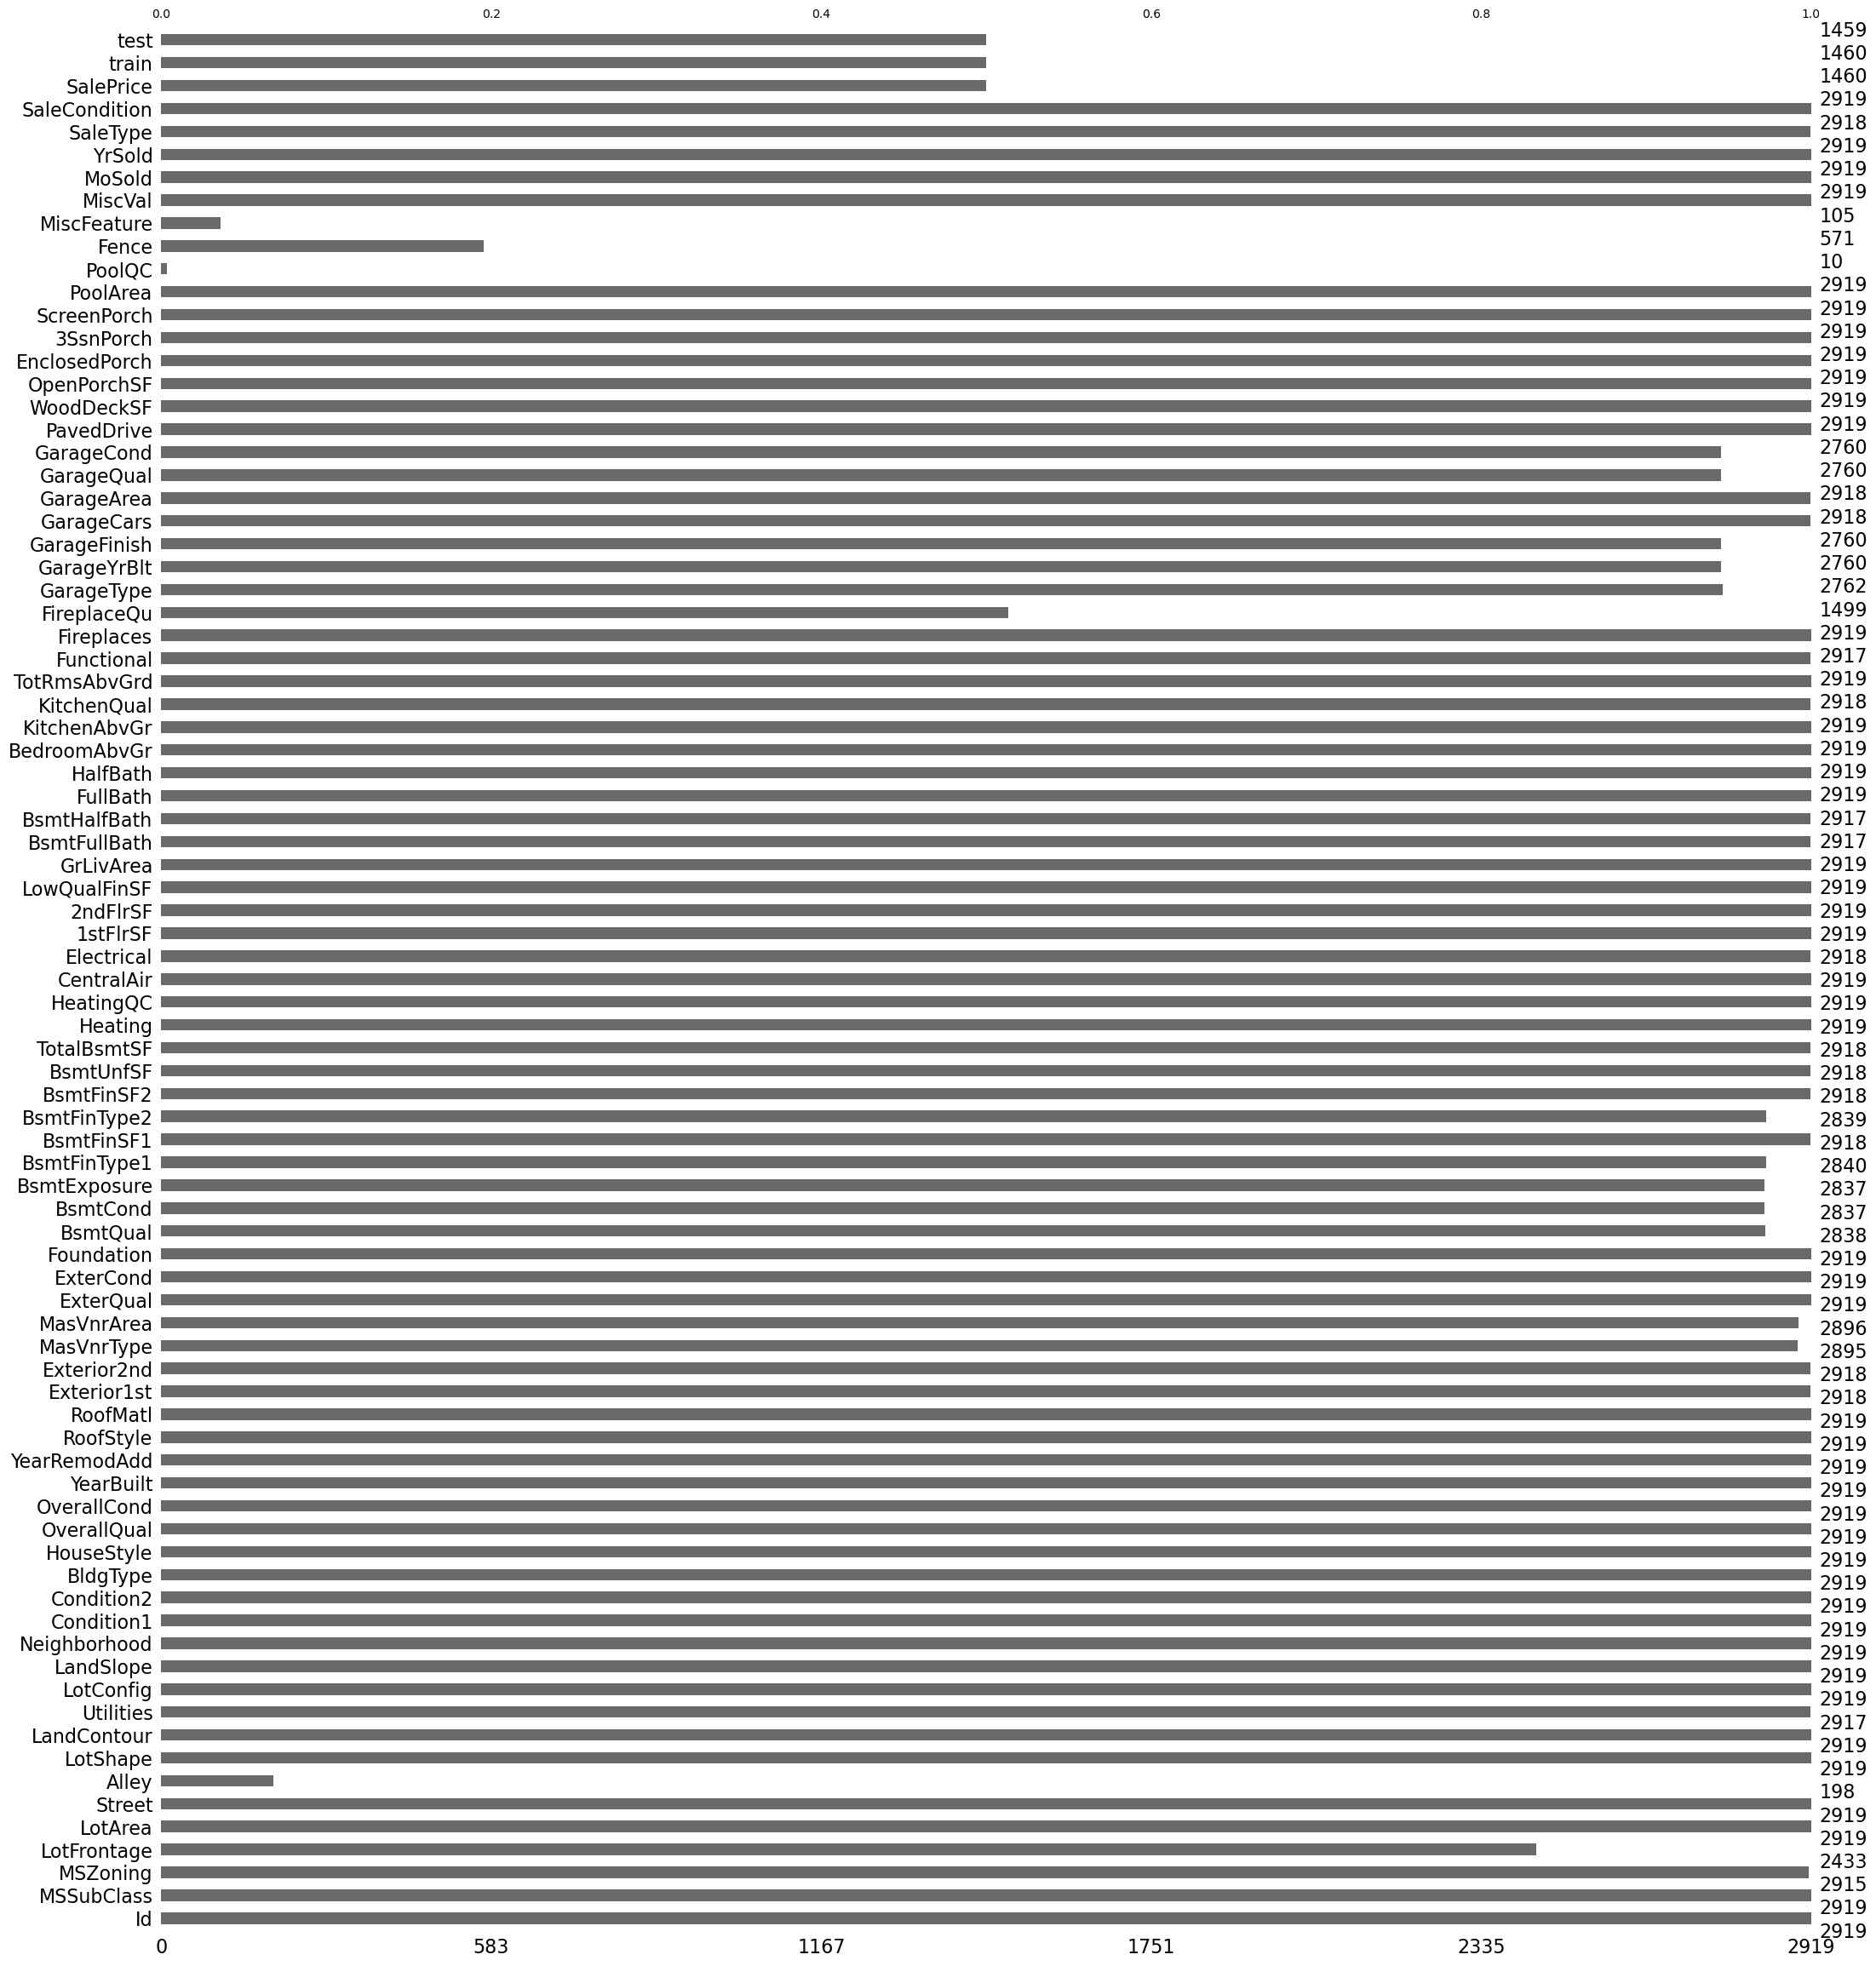

In [11]:
# Verificando se tem valores ausentes

msno.bar(price_house_all)

In [12]:
percent_missing = price_house_all.isnull().sum() * 100 / len(price_house_all)

missing_value_df = pd.DataFrame({'qtd_missing': price_house_all.isnull().sum(),
                                 'percent_missing': percent_missing,
                                 'column_type': price_house_all.dtypes}
                               ).reset_index().rename(columns={'index': 'column_name'})

# Filtrando as colunas que tem a porcentagem maior que 0 

missing_value_df[missing_value_df['percent_missing'] > 00.00]

,column_name,qtd_missing,percent_missing,column_type
2,MSZoning,4,0.137033,object
3,LotFrontage,486,16.649538,float64
6,Alley,2721,93.216855,object
9,Utilities,2,0.068517,object
23,Exterior1st,1,0.034258,object
24,Exterior2nd,1,0.034258,object
25,MasVnrType,24,0.822199,object
26,MasVnrArea,23,0.787941,float64
30,BsmtQual,81,2.774923,object
31,BsmtCond,82,2.809181,object


<h3 style="color: #cca002"><strong>Observações sobre os valores missing:</strong></h3>

Pelas análises acima, percebemos que tem algumas colunas com valores missing muito alto e outras com valores missing insignificante.

Para essas *variáveis categóricas* pode ser feito o tratamento dos valores missings substituindo os NaNs para sua devidas descrição e para as *variáveis numéricas* pode ser feito a tratamento de de substituir os NaNs pelo valor mais frequente da coluna. 

<!-- Os tratamento só não vão ser aplicados nas colunas *SalePrice, train, test*, pois as colunas train e test foi criada para facilitar a separação depois e a coluna SalePrice tem valores missing devido a mesclagem dos datasets. -->

<span style="color: #cca002">**Obs:**</span> As descrição das colunas estão no arquivo [DictionaryData]("https://github.com/anamariapego/House_Price_Predicition/blob/main/02-Documentos_Refer%C3%AAncias/DictionaryData.ipynb") na pasta 02-Documentos_Referencias. 

In [13]:
# Fazendo os tratamentos dos valores missing das variáveis categóricas 

values = {'MasVnrType': 'None', 'BsmtQual':'No Basement', 'BsmtCond': 'No Basement', 'BsmtExposure': 'No Basement', 
          'BsmtFinType1': 'No Basement', 'BsmtFinType2': 'No Basement', 'FireplaceQu': 'No Fireplace', 
          'GarageType': 'No Garage','GarageYrBlt': 0, 'GarageFinish': 'No Garage', 'GarageQual': 'No Garage', 
          'GarageCond': 'No Garage',  'Alley': 'Without Access', 'PoolQC': 'No Pool', 'Fence': 'No Fence', 
          'MiscFeature': 'No Features'}

price_house_all.fillna(value=values, inplace = True)

In [14]:
# Fazendo os tratamentos dos valores missing das variáveis numéricas

imputer_number = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

# Removendo as colunas (SalePrice, train, test)

column_number = price_house_all.drop(columns=['SalePrice', 'train', 'test']
                                    ).select_dtypes(include=['int64', 'float64']).columns

price_house_all[column_number] = imputer_number.fit_transform(price_house_all[column_number])

In [15]:
# Verificando os valores missing após as tranformações

price_house_all[price_house_all.drop(columns=['SalePrice', 'train', 'test']).isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train,test
1379,1380.0,80.0,RL,73.0,9735.0,Pave,Without Access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5.0,5.0,2006.0,2007.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754.0,640.0,0.0,1394.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,0.0,No Fireplace,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,5.0,2008.0,WD,Normal,167500.0,Train,NaN
95,1556.0,50.0,RL,72.0,10632.0,Pave,Without Access,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5.0,3.0,1917.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725.0,499.0,0.0,1224.0,0.0,0.0,1.0,1.0,3.0,1.0,NaN,6.0,Mod,0.0,No Fireplace,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0.0,0.0,248.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,1.0,2010.0,COD,Normal,NaN,NaN,Test
455,1916.0,30.0,NaN,109.0,21780.0,Grvl,Without Access,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2.0,4.0,1910.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,N,FuseA,810.0,0.0,0.0,810.0,0.0,0.0,1.0,0.0,1.0,1.0,TA,4.0,Min1,0.0,No Fireplace,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119.0,24.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,3.0,2009.0,ConLD,Normal,NaN,NaN,Test
485,1946.0,20.0,RL,60.0,31220.0,Pave,Without Access,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6.0,2.0,1952.0,1952.0,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474.0,0.0,0.0,1474.0,0.0,0.0,1.0,0.0,3.0,1.0,TA,7.0,Min2,2.0,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0.0,0.0,144.0,0.0,0.0,0.0,No Pool,No Fence,Shed,750.0,5.0,2008.0,WD,Normal,NaN,NaN,Test
691,2152.0,30.0,RL,85.0,19550.0,Pave,Without Access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5.0,7.0,1940.0,2007.0,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518.0,0.0,0.0,1518.0,1.0,0.0,1.0,0.0,2.0,1.0,Fa,5.0,Typ,2.0,Gd,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage,Y,0.0,39.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,1.0,2008.0,WD,Normal,NaN,NaN,Test
756,2217.0,20.0,NaN,80.0,14584.0,Pave,Without Access,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1.0,5.0,1952.0,1952.0,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,Wall,Po,N,FuseA,733.0,0.0,0.0,733.0,0.0,0.0,1.0,0.0,2.0,1.0,Fa,4.0,NaN,0.0,No Fireplace,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,2.0,2008.0,WD,Abnorml,NaN,NaN,Test
790,2251.0,70.0,NaN,60.0,56600.0,Pave,Without Access,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5.0,1.0,1900.0,1950.0,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150.0,686.0,0.0,1836.0,0.0,0.0,2.0,0.0,4.0,1.0,TA,7.0,Maj1,0.0,No Fireplace,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,1.0,2008.0,WD,Normal,NaN,NaN,Test
1013,247

As colunas que tinha valores missing  com um percentual abaixo de 0% e com quantidade menor que 5 NaNs  não foram consideradas para passar pelas transformações, as linhas com esses valores serão excluídas.

In [16]:
# Removendo os valores missing das colunas desejadas que contém missing

price_house_all.dropna(subset=['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 
                               'Electrical','KitchenQual', 'Functional', 'SaleType'], inplace = True)


In [17]:
# Transformando o 'Id' em index da tabela

price_house_all.index = price_house_all['Id']
price_house_all.index.name = None

# Removendo a coluna 'Id'

price_house_all.drop(columns = ['Id'], inplace=True)

<h3 style="color: #526910"><strong>Conclusão da Sessão</strong></h3>

Na sesão de **Preparação de Dados** foi realizado:

* limpeza dos dados
* tratamento dos dados
* análise e remoção dos valores misssings 

<h1 style="text-align:center;" ><a id="ses5">Análise Exploratória dos Dados</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

O objetivo dessa etapa é para analisar e investigar conjuntos de dados, resumir suas principais características e também usar métados visuais para analisar. Essa etapa permite descobrir padrões, detectar anomalias, testar uma hipótese ou verificar suposições. 

<span style="color: #cca002">**Obs:**</span> Para a análise exploratória vamos usar os dados de **train**, pois é o dataset que possui os preços das casa.

In [18]:
# Selecionando os dados de train

price_house_analytics = price_house_all[price_house_all['train'] == 'Train'].drop(columns=['train', 'test'])

In [19]:
# Primieras linhas

price_house_analytics.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1.0,60.0,RL,65.0,8450.0,Pave,Without Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,No Fireplace,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,2.0,2008.0,WD,Normal,208500.0
2.0,20.0,RL,80.0,9600.0,Pave,Without Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,5.0,2007.0,WD,Normal,181500.0
3.0,60.0,RL,68.0,11250.0,Pave,Without Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,9.0,2008.0,WD,Normal,223500.0
4.0,70.0,RL,60.0,9550.0,Pave,Without Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,2.0,2006.0,WD,Abnorml,140000.0
5.0,60.0,RL,84.0,14260.0,Pave,Without Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,12.0,2008.0,WD,Normal,250000.0


### Análises das Variáveis Numéricas

In [20]:
# Estatística básica das variáveis numericas

price_house_analytics.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0,56.881426,42.310746,20.0,20.0,50.0,70.0,190.0
LotFrontage,1459.0,68.263879,22.363676,21.0,60.0,63.0,79.0,313.0
LotArea,1459.0,10517.363948,9984.666267,1300.0,7549.0,9477.0,11603.0,215245.0
OverallQual,1459.0,6.100069,1.383171,1.0,5.0,6.0,7.0,10.0
OverallCond,1459.0,5.575737,1.113079,1.0,5.0,5.0,6.0,9.0
YearBuilt,1459.0,1971.244003,30.199555,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1459.0,1984.850583,20.644343,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1459.0,103.187800,180.773158,0.0,0.0,0.0,164.5,1600.0
BsmtFinSF1,1459.0,443.943797,456.106417,0.0,0.0,384.0,712.5,5644.0
BsmtFinSF2,1459.0,46.581220,161.369977,0.0,0.0,0.0,0.0,1474.0


In [21]:
# Selecionando as variáveis numéricos

columns_number = price_house_analytics.select_dtypes(exclude=['object']).columns

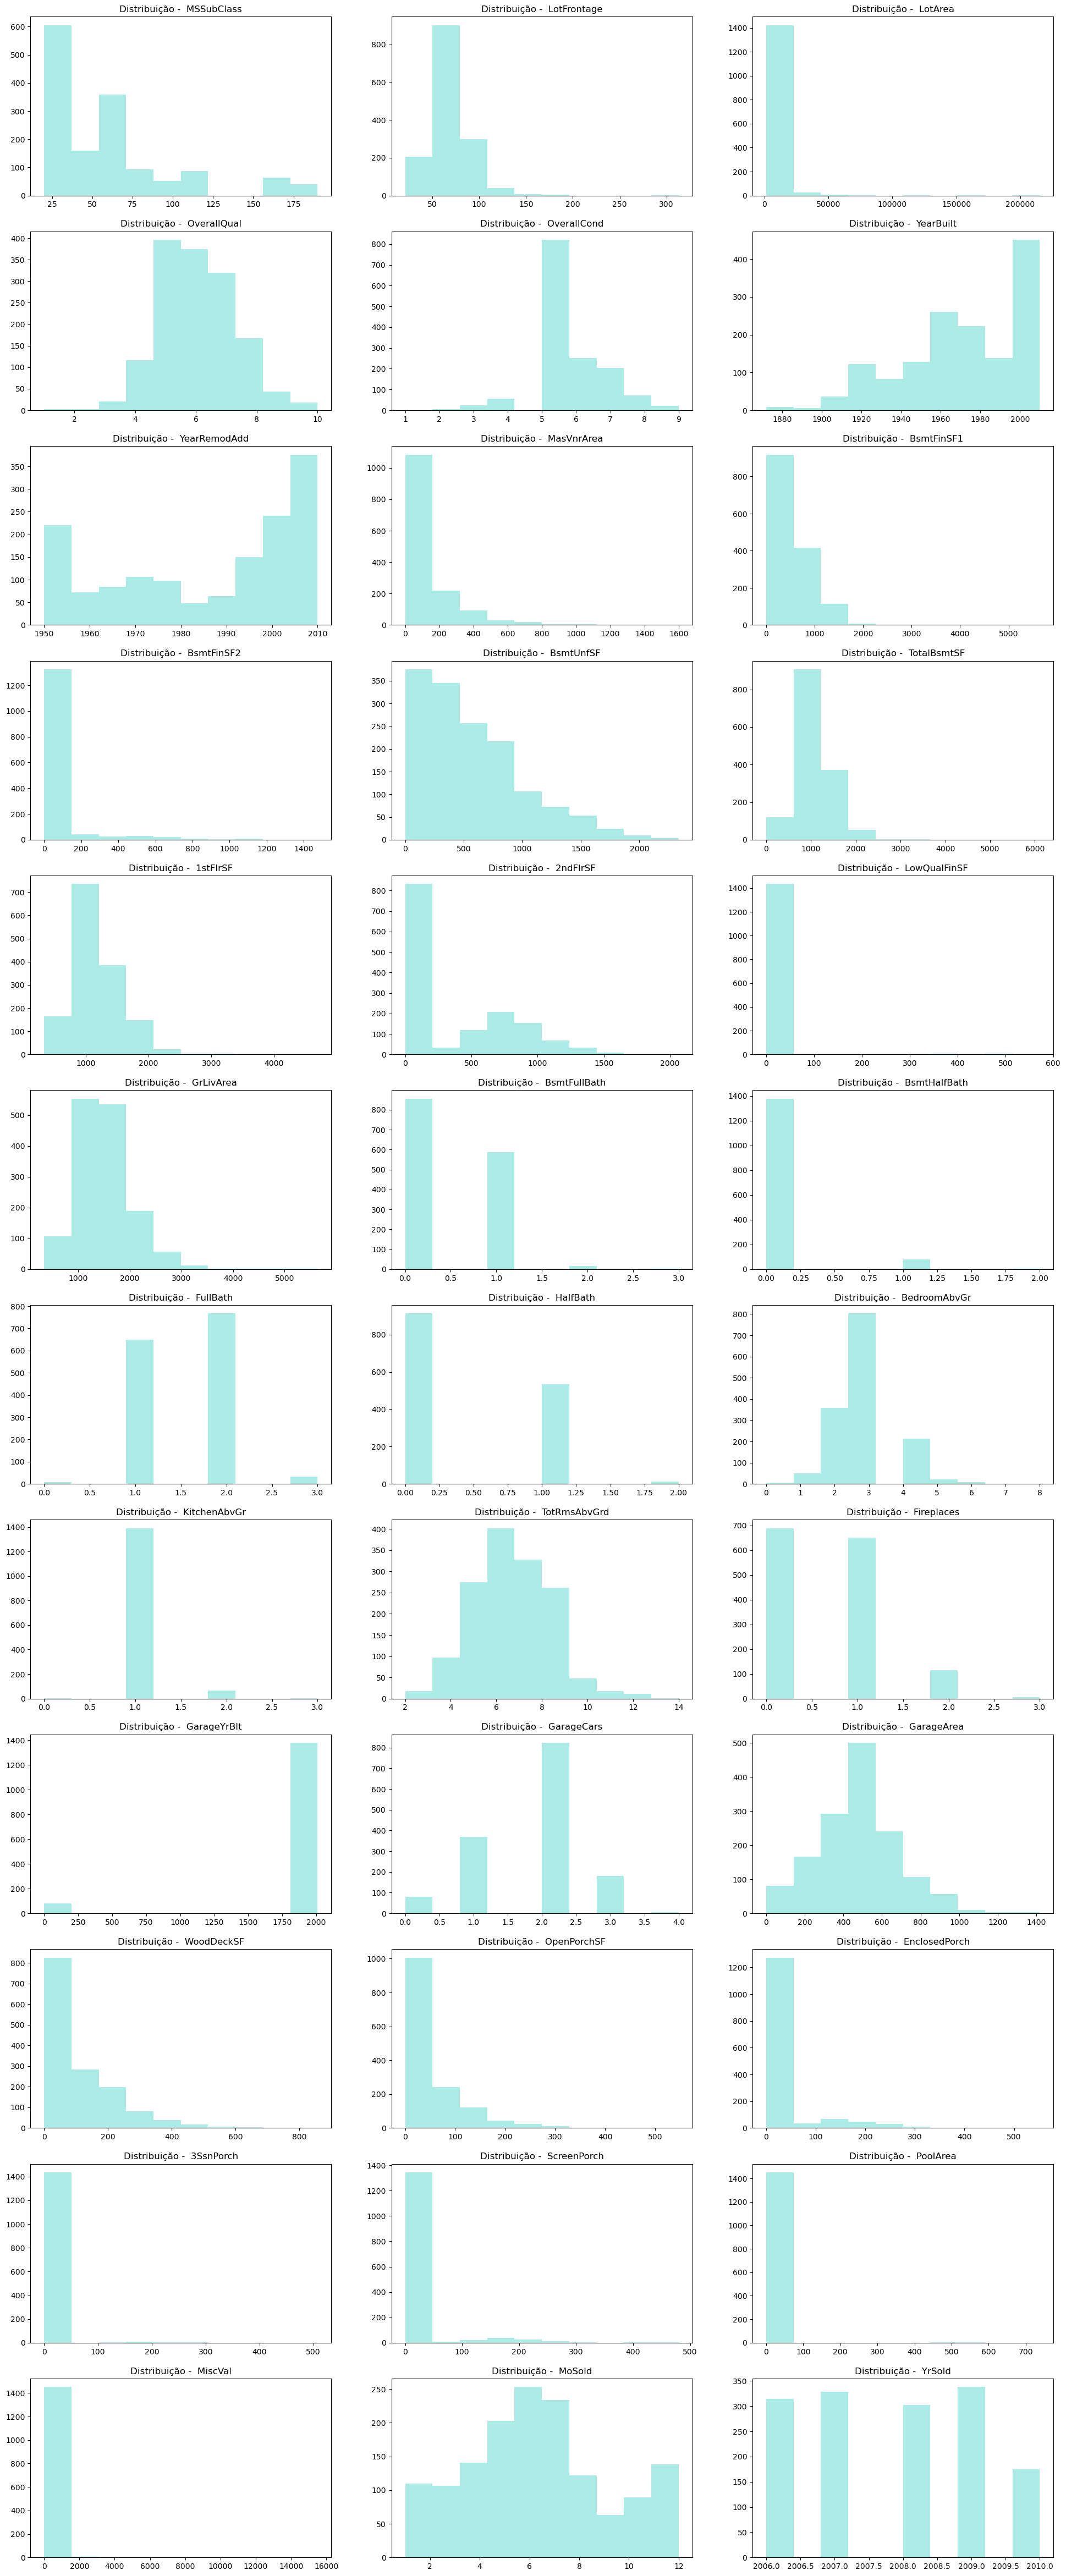

In [35]:
plt.figure(figsize=(24,60))
col_count = 1

for col in columns_number[:36]:
    plt.subplot(12,3,col_count)
    sns.distplot(x=price_house_analytics[col], kde=False, bins=10, color = '#2BCDC1')
    plt.title(f'Distribuição -  {col}')
    
    col_count += 1

<h3 style="color: #cca002"><strong>Observações sobre as variáveis numéricas:</strong></h3>

Algumas variáveis númericas apresentam uma distribuição desbalanceadas, isto é, contendo valores com frequências muito diferentes. Isso será um problema na estapa de treinamento do modelo, o modelo pode enviesar porque o padrão dos dados para a classe dominante vai se sobressair em relação aos da classe com menor frequência. 

Varáveis que apresentam uma distribuição desbalanceada:

* A variável **BsmtFinSF2** é a área do porão se houve mais de um porão, sendo mais de 90% dos valores concentrado em 0. 
* A variável **LowQualFinSF** é a quantidade de metros quadrados com acabamento de baixa qualidade, sendo que apresenta uma distibuição quase total concentrada no valor 0
* A variável **BsmtHalfBath** informa a quantidade de banheiro no porão e sua distribuição se concentra no valor 0.
* A variável **KitchenAbvGr** é a classificação das cozinhas na casa, sendo que as classificações diferente de 1 quase não tem frequência relevante perto da classificação 1.
* A variável **EnclosedPorch** representa a área de varanda fechada em metros quadrados, sendo que mais de 90% dos valores concentrado em 0.
* A variável **3SsnPorch** é a área de varanda de três estações e quase 95% dos valores estão concentrado em 0.
* A variável **ScreenPorch** é a área da varanda com tela, sendo que sua concentração em 0 é muito grande em relação aos outros valores.
* A variável **MiscVal** é o valor do recurso diverso sendo quase 95% dos valores concentrados em 0.



Essas variáveis com esses desbalanceamentos serão descartados.

In [36]:
# Descartando as variáveis com desbalanceamento do dataset geral que é o nosso 'price_house_all' 

price_house_all.drop(columns = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch',
                                '3SsnPorch', 'ScreenPorch', 'MiscVal'], inplace=True)

KeyError: "['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal'] not found in axis"

### Análises das Variáveis Categóricas

In [37]:
# Estatística básica das variáveis categóricas

price_house_analytics.describe(include=['object']).T

,count,unique,top,freq
MSZoning,1459,5,RL,1150
Street,1459,2,Pave,1453
Alley,1459,3,Without Access,1368
LotShape,1459,4,Reg,924
LandContour,1459,4,Lvl,1310
Utilities,1459,2,AllPub,1458
LotConfig,1459,5,Inside,1051
LandSlope,1459,3,Gtl,1381
Neighborhood,1459,25,NAmes,225
Condition1,1459,9,Norm,1259


In [38]:
# Selecionando as variáveis categóricas

columns_string = price_house_analytics.select_dtypes(exclude=['float64', 'int64']).columns

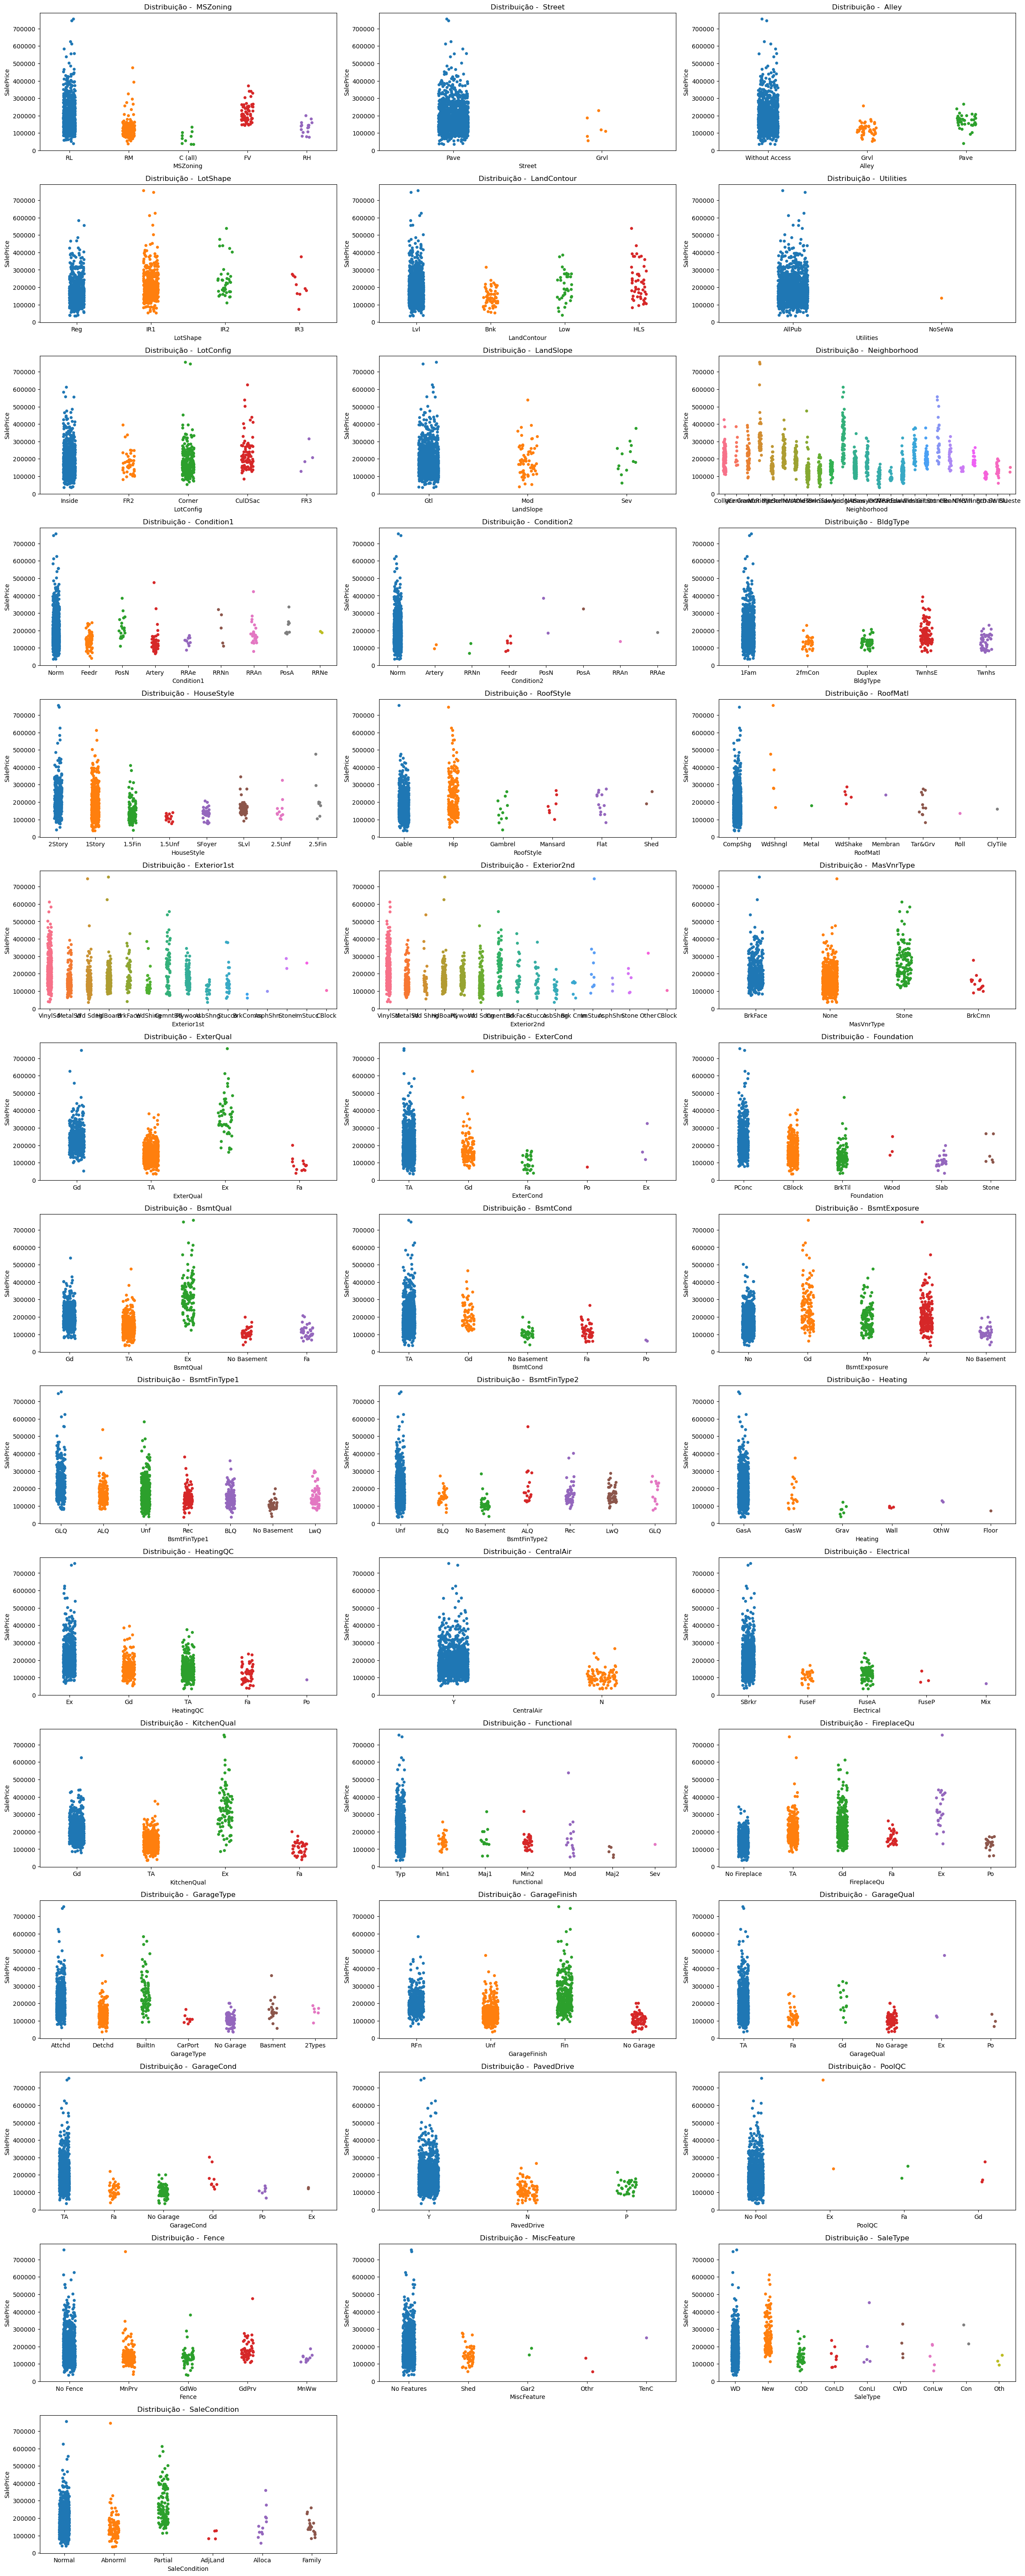

In [39]:
plt.figure(figsize=(24,60))
col_count = 1

for col in columns_string:
    plt.subplot(15,3,col_count)
    plt.tight_layout()
    
    sns.stripplot(data=price_house_analytics, x = price_house_analytics[col], 
                  y=price_house_analytics['SalePrice'], hue = price_house_analytics[col], legend=False)
    plt.title(f'Distribuição -  {col}')
    
    col_count += 1

<h3 style="color: #cca002"><strong>Observações sobre as variáveis categóricas:</strong></h3>

Algumas variáveis categóricas também apresentam distribuição desbalanceada, vamos avaliar essas variável uma a uma.

Varáveis que apresentam uma distribuição desbalanceada:

* A variável **Street** é o tipo de acesso à propriedade, pelo gráfico dessa variável percebe que o tipo *Grvl* não tem uma representação significativa comparada com o tipo *Pave*. 
* A variável **Utilities** é o tipo de utilitários disponíveis e essa variável é preenchida com dois valores, sendo um deles aparecer uma vez. 
* A variável **Condition2** informa as condições da casa se houver mais de uma. Existem 7 condições diferentes com frequência muito baixa sendo que quase 95% das casas não tem mais de uma condição.
* A variável **RoofMatl** é o tipo de material de telahado da casa. Sendo que quase todas as casa tem o material de tenahdo padrão, variando muito pouco para outro tipo de telhado.
* Outra variável que tem uma distribuição desbalanceada é a **Heating**, que é o tipo de aquecimento da casa. Variando muito pouco do padrão das casas que é o aquecimento por forno de ar a gás (GasA).

* A informação se a casa tem ou não piscina **PoolQC**, e se tem qual estado está, não está bem distribuindas entre seus valores. Mais 95% das casas não possuem piscina.

* E 90% das casas não possuem outros recurso diverso não coberto em outras categorias, **MiscFeatures**.


Essas variáveis com esses desbalanceamentos serão descartados.

In [40]:
# Descartando as variáveis com desbalanceamento do dataset geral que é o nosso 'price_house_all' 

price_house_all.drop(columns = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 
                               'PoolArea', 'MiscFeature'], inplace=True)

<h3 style="color: #cca002"><strong>Observações considerando as observações das variáveis acima:</strong></h3>

Analisando apenas as distribuições das variáveis categóricas e numéricas, algumas variáveis serão descartadas para seguir com as análises. Mas no decorrer do desenvolvimento pode ser feito a remoção de alguma variável se for necessário. 

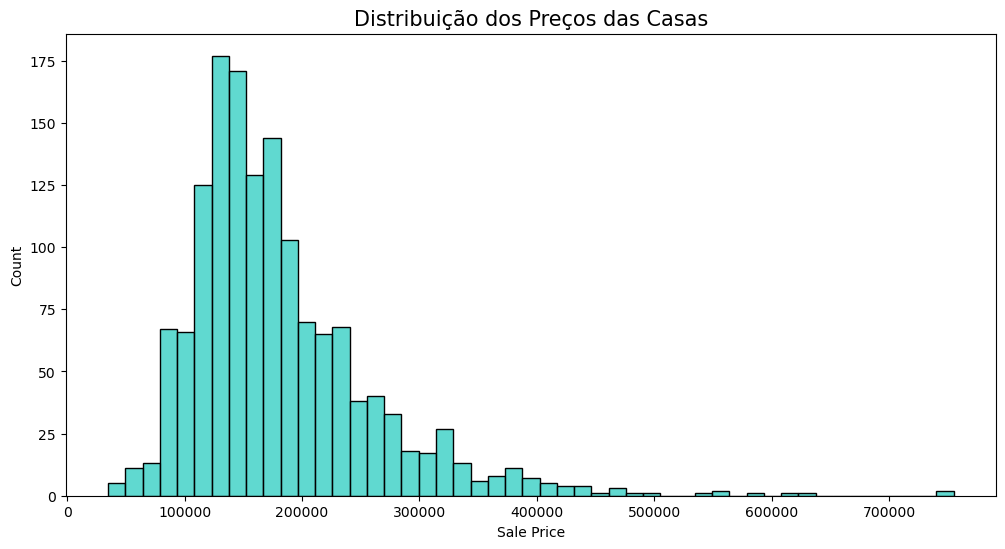

In [42]:
# Histograma da faixa de preço daS casas

plt.figure(figsize=(12,6))
sns.histplot(price_house_analytics.SalePrice, color = '#2BCDC1')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Distribuição dos Preços das Casas', size = 15)
plt.show()

<h3 style='color : #cca002'> Observações </h3>

A concentração dos preços se encontra na faixa de 1.000.000 entre 4.000.000 e algumas casas passando de 7.000.000. Agora, vamos analisar a relação do preço da casa com a sua localidade.

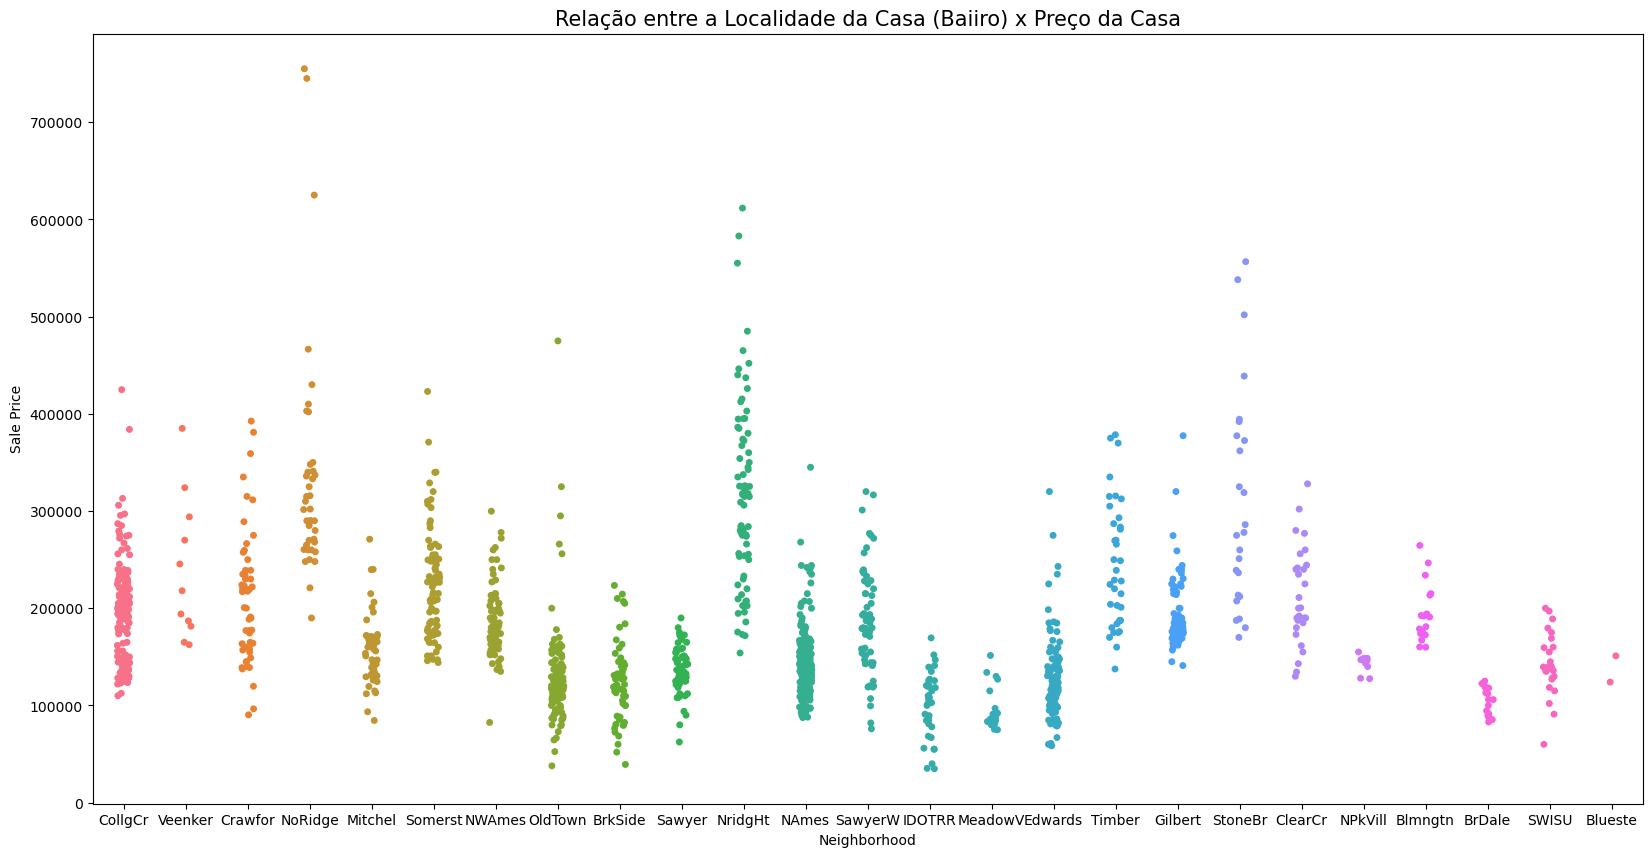

In [43]:
plt.figure(figsize=(20,10))
sns.stripplot(data = price_house_analytics, y = 'SalePrice', x = 'Neighborhood', hue = 'Neighborhood', legend = False)
plt.title('Relação entre a Localidade da Casa (Baiiro) x Preço da Casa', size = 15)
plt.ylabel('Sale Price')
plt.show()

<h3 style = 'color : #cca002'> Obsersevações</h3>

Ao analisar a varição de preços com o a a localidade, neste caso com o bairro, percebemos que o bairro *NoRidge* é um dos mais caro, seguido pelo bairro *NridgHt* e *StoneBar*. E o bairro que tem os preços das casas mais baixos é *IDOTRR*, seguido por *OldTown* e *BrkSide*. 

Vamos analisar a relação dos preços com algumas características da casa. Escolhi algumas características, tipo banheiro, cozinha, lareiras, garagem, piscina e cerca para realizar essa análise.

In [44]:
# Selecionando as características  

features_house = price_house_analytics[['BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces']]

# Transformando algumas variáveis em boleano

features_house['Garage'] = price_house_analytics['GarageType'].map(lambda x: 0 if x =='No Garage' else 1)

features_house['Pool'] = price_house_analytics['PoolQC'].map(lambda x: 0 if x =='No Pool' else 1)

features_house['Fence'] = price_house_analytics['Fence'].map(lambda x: 0 if x =='No Fence' else 1)

# Adicionando a variável preço

features_house['SalePrice'] = price_house_analytics['SalePrice']

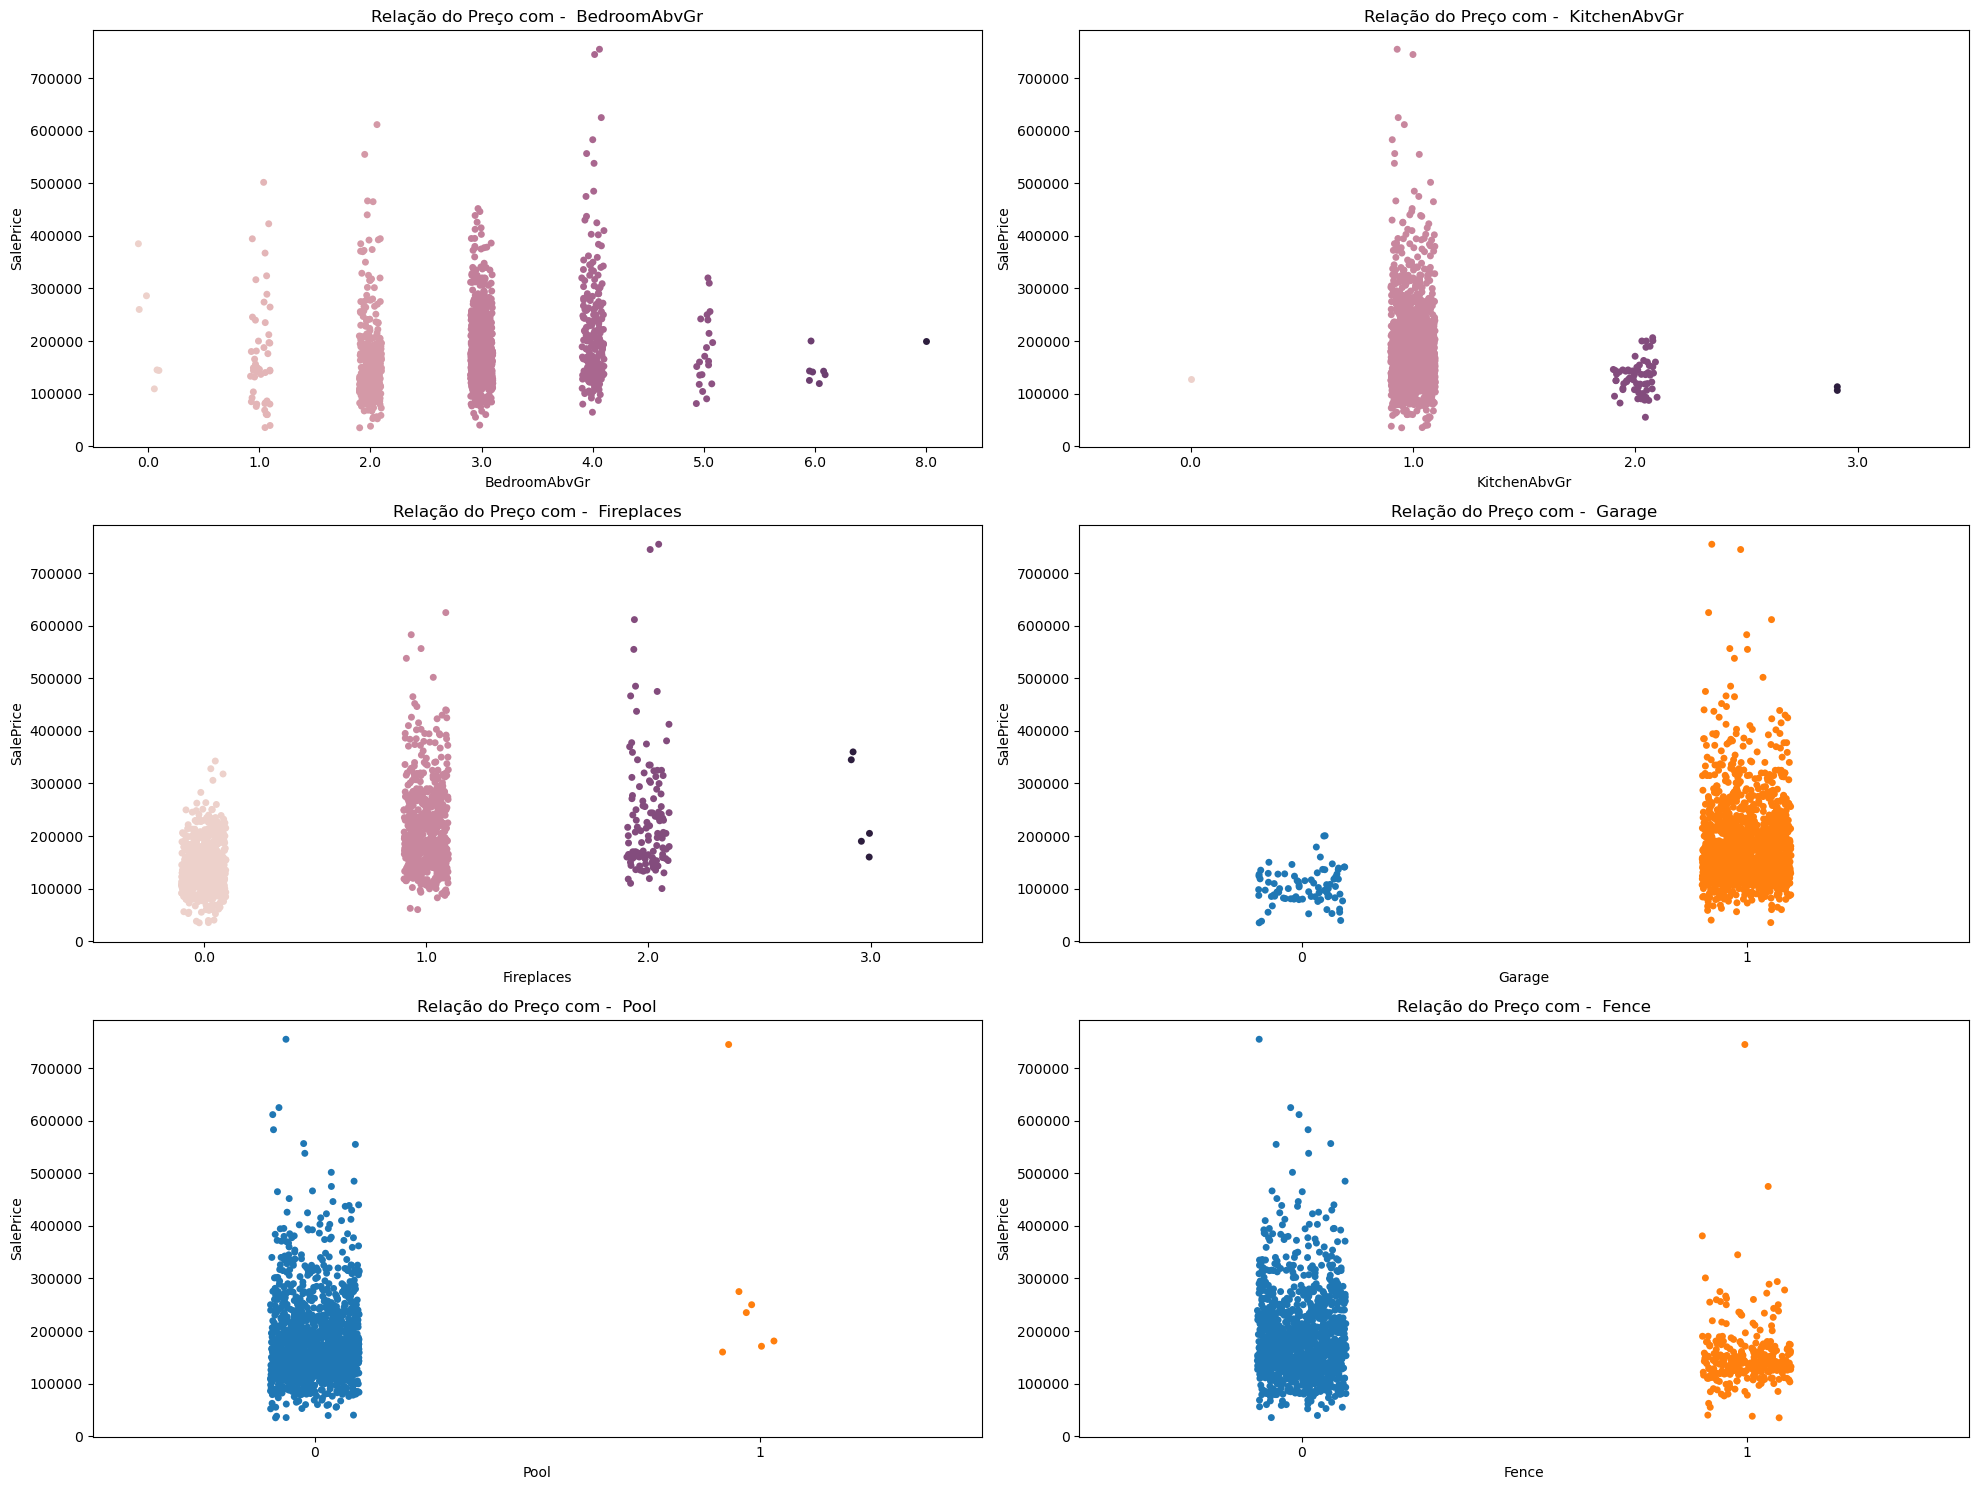

In [45]:
plt.figure(figsize=(20,15))
col_count = 1

for col in features_house.iloc[:,:-1]:

    plt.subplot(3,2,col_count)
    plt.tight_layout()
    
    sns.stripplot(data=features_house, x = features_house[col], 
                  y=features_house['SalePrice'], hue = features_house[col], legend=False)
    plt.title(f'Relação do Preço com -  {col}')
    
    col_count += 1

<h3 style = "color : #cca002">Observações </h3>

Analisando o gráfico acima a relação da casa com a quantidade de banheiro, cozinha e lareiras não tem preço maior por ter uma quantidade a mais. Por exemplo: uma casa de 8 banheiros pode valer menos que uma casa que tem 1 banheiro ou uma casa com 3 cozinhas pode valer menos com uma casa com 1 cozinha. 

Se a casa possuem uma garagem seu valor é mais valorizado e pouca casas não possuem garagem.

A maioria das casas não possuem piscina o que não deixar de ter um valor alto na casa devido a isso.

E tem muitas casas com cerca e muitas sem cerca, o que não diferencia muito para definir seu valor. 

In [46]:
# Criando uma coluna com descrição das avaliações para melhor representação no gráfico

desc_cond = {10:'Very Excellent',
             9: 'Excellent',
             8: 'Very Good',
             7: 'Good',
             6: 'Above Average',
             5: 'Average',
             4: 'Below Average',
             3: 'Fair',
             2: 'Poor',
             1: 'Very Poor'}

price_house_analytics['DescCond'] = price_house_analytics['OverallQual'].replace(desc_cond)

In [47]:
cats_order = ['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 
              'Above Average', 'Good', 'Very Good','Excellent', 'Very Excellent']

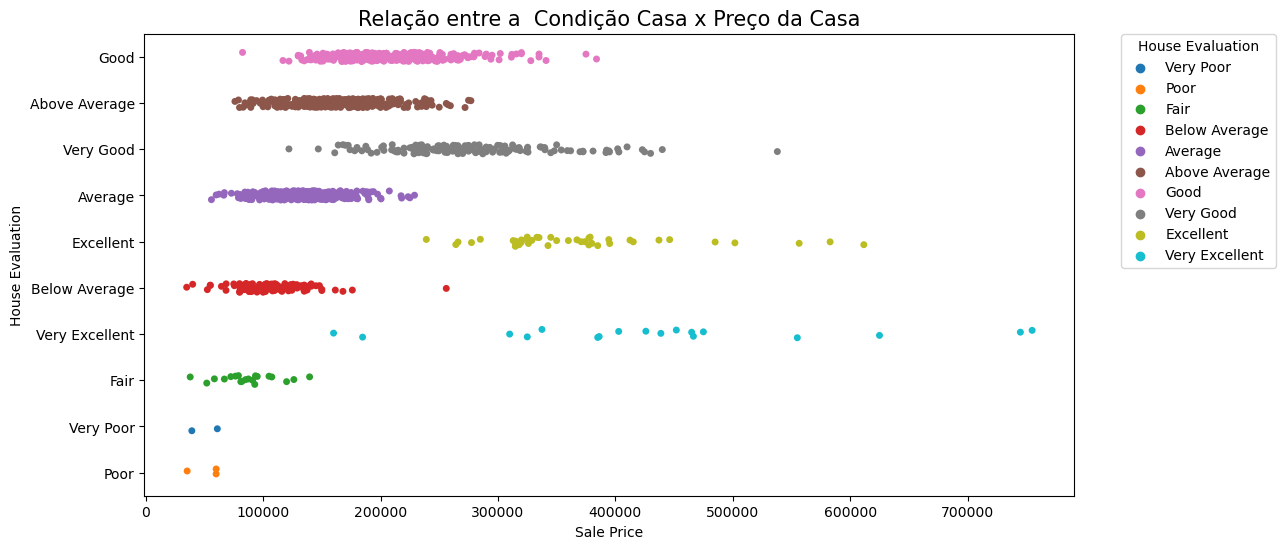

In [48]:
plt.figure(figsize=(12,6))
sns.stripplot(data=price_house_analytics, x='SalePrice', y='DescCond',hue = 'DescCond', hue_order=cats_order)

plt.title('Relação entre a  Condição Casa x Preço da Casa', size = 15)
plt.xlabel('Sale Price')
plt.ylabel('House Evaluation')

plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.,
          title ='House Evaluation')
plt.show()

<h3 style = "color : #cca002">Observações </h3>

A variável *OverallQual* descreve a qualidade geral do material e o acabamento da casa em uma escala de 1 a 10. Percebemos que tem impacto a avalição da qualidade da em relação aos valores, os valores começam a serem mais altos quando a casa está com uma classifição maior que 3 (*Fair*). A maioria das casas estão acima da classificação 4 (*Below Average*) e há uma boa concentração das casas na classificação 5 (*Avarege*).

Text(0.5, 0, 'Ano de Construção')

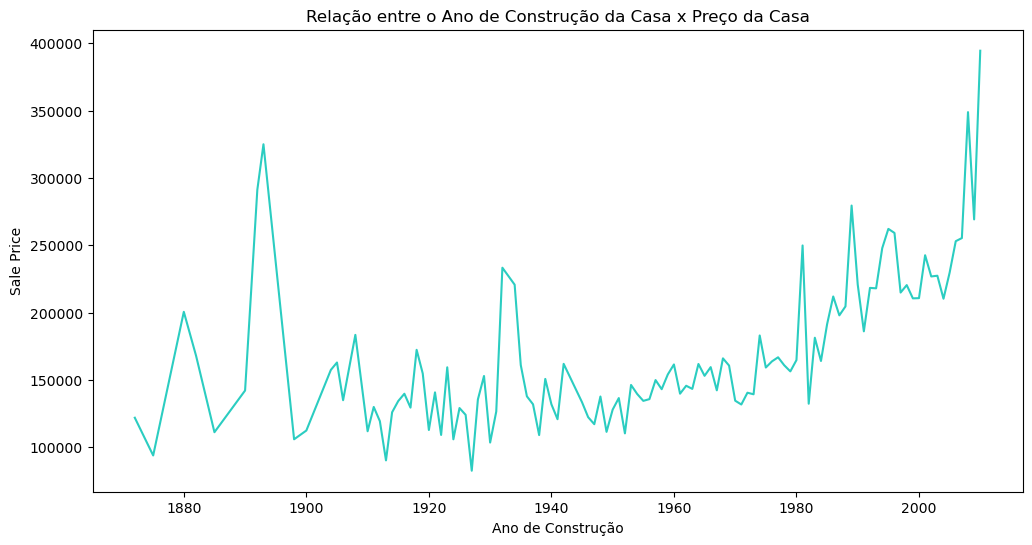

In [53]:
# Anos das casa x preços

plt.figure(figsize=(12,6))
sns.lineplot(y = price_house_analytics.SalePrice, x = price_house_analytics.YearBuilt, ci = None, color = '#2BCDC1')
plt.title('Relação entre o Ano de Construção da Casa x Preço da Casa')
plt.ylabel('Sale Price')
plt.xlabel('Ano de Construção')

<h3 style = "color : #cca002">Observações </h3>

* Nos anos de 1880 e 1990 houve um pico nos valores das casas
* Entre 1900 e 1970 se manteve não tendo muitas alteração 
* E a partir de 1970 começou a ter um crescimento positivo em relação aos valores das casa

#### Agora vamos analisar a correlação entre as variáveis 

In [54]:
price_house_all.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.38,-0.20,0.03,-0.07,0.03,0.04,0.01,-0.06,-0.13,-0.22,-0.25,0.31,0.07,0.01,0.14,0.18,-0.01,0.04,-0.05,-0.11,-0.05,-0.10,-0.02,-0.02,-0.00,-0.02,-0.08
LotFrontage,-0.38,1.00,0.34,0.21,-0.07,0.11,0.09,0.20,0.19,0.12,0.33,0.41,0.02,0.34,0.09,0.16,0.02,0.21,0.32,0.21,0.09,0.28,0.33,0.09,0.15,0.01,-0.01,0.33
LotArea,-0.20,0.34,1.00,0.11,-0.02,0.03,0.03,0.13,0.20,0.02,0.26,0.33,0.03,0.29,0.13,0.13,0.04,0.13,0.22,0.26,0.08,0.19,0.22,0.16,0.11,0.01,-0.02,0.26
OverallQual,0.03,0.21,0.11,1.00,-0.10,0.60,0.57,0.43,0.28,0.27,0.55,0.48,0.25,0.58,0.16,0.53,0.27,0.07,0.39,0.39,0.28,0.60,0.57,0.25,0.30,0.03,-0.02,0.79
OverallCond,-0.07,-0.07,-0.02,-0.10,1.00,-0.38,0.04,-0.14,-0.06,-0.14,-0.18,-0.16,0.01,-0.12,-0.05,-0.22,-0.09,-0.01,-0.09,-0.04,0.02,-0.19,-0.16,0.02,-0.07,-0.01,0.03,-0.08
YearBuilt,0.03,0.11,0.03,0.60,-0.38,1.00,0.61,0.31,0.28,0.13,0.41,0.31,0.02,0.24,0.21,0.47,0.27,-0.05,0.11,0.17,0.26,0.54,0.48,0.23,0.20,0.01,-0.01,0.52
YearRemodAdd,0.04,0.09,0.03,0.57,0.04,0.61,1.00,0.19,0.15,0.17,0.30,0.24,0.16,0.32,0.13,0.46,0.21,-0.02,0.20,0.13,0.15,0.43,0.38,0.22,0.24,0.01,0.03,0.51
MasVnrArea,0.01,0.20,0.13,0.43,-0.14,0.31,0.19,1.00,0.30,0.09,0.39,0.39,0.12,0.40,0.14,0.25,0.19,0.08,0.28,0.27,0.13,0.36,0.37,0.17,0.14,-0.00,-0.02,0.47
BsmtFinSF1,-0.06,0.19,0.20,0.28,-0.06,0.28,0.15,0.30,1.00,-0.48,0.54,0.46,-0.16,0.21,0.64,0.08,-0.01,-0.11,0.05,0.29,0.13,0.26,0.31,0.22,0.12,-0.00,0.02,0.39
BsmtUnfSF,-0.13,0.12,0.02,0.27,-0.14,0.13,0.17,0.09,-0.48,1.00,0.41,0.30,-0.00,0.23,-0.40,0.27,-0.04,0.18,0.25,0.00,0.01,0.18,0.16,-0.04,0.12,0.02,-0.04,0.21


<h3 style = "color : #cca002">Observações </h3>

As cores mais intensas na matriz acima indica uma correlação muito forte, sendo essa correlação positiva ou negativa, e as cores menos intensas indica uma correlação fraca. As seguintes variáveis têm uma correlação muito fraca, sendo um avlor inferior que 0,1(negativo ou positivo):

* MSSubClass	
* OverallCond
* MoSold
* YrSold

Essas variáveis serão descartadas.

In [55]:
# Descartando as variáveis com desbalanceamento do dataset geral que é o nosso 'price_house_all' 

price_house_all.drop(columns = ['MSSubClass', 'OverallCond', 'MoSold', 'YrSold'], inplace=True)

<h3 style="color: #526910"><strong>Conclusão da Sessão</strong></h3>

Com base na Análise Exploratória foi analisado:

* distribuição dos valores das variáveis numéricas e categóricas
* análise de distibuição de valores dos preços das casas
* relação do preço da casa com o ano de contrução e algumas características que as casas possueam
* a matriz de correlação para entender como estão as correlações de todas as variáveis com a variável *SalePrice*.

Com esta análise foi reduzido o dataset, deixando as variáveis mais relevantes para as próximas etapas.

<h1 style="text-align:center;" ><a id="ses6">Normalização dos Dados</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

O objetivo dessa etapa é transfomar os dados de uma forma que eles tenham distribuições semelhantes. 

In [56]:
# lista das colunas a serem normalizadas e também removendo algumas colunas que não serão normalizadas,
# pois algumas são de anos, outras são encode já e a variável SalePrice

list_columns = price_house_all.select_dtypes(exclude='object'
                                            ).drop(
    columns=['OverallQual','YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'SalePrice']).columns.to_list()

In [57]:
price_house_all[list_columns] = normalize(price_house_all[list_columns])

<h1 style="text-align:center;" ><a id="ses7">Encoding dos Dados</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

O objetivo dessa etapa é transfomar os dados do tipo categóricos em número. Os modelos de Machine Learning exigem que todas as variáveis de entrada e saída sejam numéricas, por isso dever-se codificar os dados categóricos antes de poder ajustar e avaliar um modelo.

In [58]:
price_house_all.head() # OverallQuall, YearBuilt, YearRemodAdd, GarageYrBlt

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,train,test
1.0,RL,0.007389,0.960543,Without Access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7.0,2003.0,2003.0,Gable,VinylSd,VinylSd,BrkFace,0.022280,Gd,TA,PConc,Gd,TA,No,GLQ,0.080254,Unf,0.017051,0.097305,Ex,Y,SBrkr,0.097305,0.097077,0.194382,0.000114,0.000227,0.000114,0.000341,Gd,0.000909,Typ,0.000000,No Fireplace,Attchd,2003.0,RFn,0.000227,0.062293,TA,TA,Y,0.000000,0.006934,No Fence,WD,Normal,208500.0,Train,NaN
2.0,RL,0.008070,0.968355,Without Access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6.0,1976.0,1976.0,Gable,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.098651,Unf,0.028647,0.127298,Ex,Y,SBrkr,0.127298,0.000000,0.127298,0.000000,0.000202,0.000000,0.000303,TA,0.000605,Typ,0.000101,TA,Attchd,1976.0,RFn,0.000202,0.046400,TA,TA,Y,0.030059,0.000000,No Fence,WD,Normal,181500.0,Train,NaN
3.0,RL,0.005896,0.975418,Without Access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7.0,2001.0,2002.0,Gable,VinylSd,VinylSd,BrkFace,0.014046,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.042138,Unf,0.037629,0.079768,Ex,Y,SBrkr,0.079768,0.075086,0.154853,0.000087,0.000173,0.000087,0.000260,Gd,0.000520,Typ,0.000087,TA,Attchd,2001.0,RFn,0.000173,0.052716,TA,TA,Y,0.000000,0.003642,No Fence,WD,Normal,223500.0,Train,NaN
4.0,RL,0.006093,0.969793,Without Access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7.0,1915.0,1970.0,Gable,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,0.021935,Unf,0.054836,0.076771,Gd,Y,SBrkr,0.097589,0.076771,0.174360,0.000102,0.000102,0.000000,0.000305,Gd,0.000711,Typ,0.000102,Gd,Detchd,1998.0,Unf,0.000305,0.065194,TA,TA,Y,0.000000,0.003554,No Fence,WD,Abnorml,140000.0,Train,NaN
5.0,RL,0.005749,0.976046,Without Access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8.0,2000.0,2000.0,Gable,VinylSd,VinylSd,BrkFace,0.023956,Gd,TA,PConc,Gd,TA,Av,GLQ,0.044832,Unf,0.033539,0.078371,Ex,Y,SBrkr,0.078371,0.072074,0.150445,0.000068,0.000137,0.000068,0.000274,Gd,0.000616,Typ,0.000068,TA,Attchd,2000.0,RFn,0.000205,0.057221,TA,TA,Y,0.013142,0.005749,No Fence,WD,Normal,250000.0,Train,NaN


In [59]:
list_columns_cat = price_house_all.select_dtypes(include='object').drop(columns=['train', 'test']).columns

In [60]:
# Instanciando as funções encoder para as variáveis categóricas

encoder = {}

for col in list_columns_cat:
    encoder[col] = LabelEncoder()
    price_house_all[col] = encoder[col].fit_transform(price_house_all[col])

In [ ]:
# Código para fazer o inverso do LabelEncoder() para conferir a codificação

# for col in list_columns_cat:
#     price_house_all[col] = encoder[col].inverse_transform(price_house_all[col])

<h3 style="color: #526910"><strong>Conclusão da Sessão</strong></h3>

Com base nas duas útimas sessões, [Normalização dos Dados](#ses6) e [Encoding dos Dados](#ses7), foi realizado:

* O processo de **normalização** é para deixar os dados numéricos com escala semelhante;
* O processo de **Encoding** é para transformar os dados categóricos em números.

Esses processos são importante para que o modelo treinado tenha um bom desempenho e generalize bem. 

<h1 style="text-align:center;" ><a id="ses8">Modelo Regressão Linear</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

Vamos usar o modelo de **Regressão Linear** para prever valores de algumas casas baseadas nas suas características. Uma breve explicação do modelo voce entra na [primeira sessão](#ses1) desse notebook.

In [61]:
# Separando os dados em treino e teste

X_train = price_house_all[price_house_all['train'] == 'Train'].drop(['train', 'test', 'SalePrice'], axis =1)
X_test = price_house_all[price_house_all['test'] == 'Test'].drop(['train', 'test', 'SalePrice'], axis =1)
y_train = price_house_all[price_house_all['train'] == 'Train'].drop(['train', 'test'], axis =1)['SalePrice']
y_test = price_house_all[price_house_all['test'] == 'Test'].drop(['train', 'test'], axis =1)['SalePrice']

In [62]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1459, 59) (1450, 59) (1459,) (1450,)


In [63]:
# Definindo o modelo

model_linear_regression = LinearRegression()

In [64]:
# Treinando o modelo

model_linear_regression.fit(X_train, y_train)

LinearRegression()

In [66]:
value_price_predict = model_linear_regression.predict(X_test)

array([123393.57918712, 184237.52616335, 169286.39786218, ...,
       109336.32593926, 153991.3120675 , 241096.43504164])

In [67]:
predict_price_house = pd.DataFrame({'Id': y_test.index, 'Price_Predict': value_price_predict})
predict_price_house

,Id,Price_Predict
0,1461.0,123393.579187
1,1462.0,184237.526163
2,1463.0,169286.397862
3,1464.0,180669.858068
4,1465.0,206145.514692
...,...,...
1445,2915.0,57421.236562
1446,2916.0,30204.650266
1447,2917.0,109336.325939
1448,2918.0,153991.312068


LightGBM (Light Gradient Boosting Machine) 

LightGBM é um modelo supervisionado com estrutura de aumento de gradiente baseada em árvore de decisão para aumentar a eficiência do modelo e reduzir o uso de memória. 


As características principais do LGBM são:

* maior precisão e uma velocidade de treinamento mais rápida.

* Baixa utilização de memória

* Comparativamente melhor precisão do que outros algoritmos de impulsionamento e lida com o overfitting muito melhor ao trabalhar com conjuntos de dados menores.

* Suporte à Aprendizagem Paralela.

* Compatível com conjuntos de dados pequenos e grandes

Conclusão
E nós temos uma apresentação!

Neste notebook, exploramos uma abordagem XGBoost para prever o preço de venda de casas no conjunto de dados Preços de Casas - Técnicas de Regressão Avançada

Primeiro preparamos os dados para modelagem
Em seguida, criamos um modelo XGBoost para prever o preço de venda do nosso conjunto de dados
E por último, mas não menos importante, melhoramos nosso modelo ajustando seus hiperparâmetros
Se você passou por todos os meus cadernos, em primeiro lugar, OBRIGADO!

Foi incrível explorar esse conjunto de dados e aprender ao longo do caminho! Agora é buscar um novo desafio, fique atento e cuide-se!

In [ ]:
# Desempenhos

# from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# mae = mean_absolute_error(y_test,pred)
# mse = mean_squared_error(y_test,pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test,pred)

# print("mae=",mae)
# print("mse=",mse)
# print("rmse=",rmse)
# print("r2=",r2)

<h1 style="text-align:center;" ><a id="ses9">Seleção de Features</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

O objetivo dessa etapa, **Engenharia de Faetures**, é escolher as variáveis mais relevantes para o modelo. A adição de variáveis não relevantes para o trino do modelo pode leva-lo a reduzir a precisão geral do modelo, aumentar a complexibilidade e diminuir a capacidade de generalização do modelo e torná-lo tendencioso. 

Para melhor seleção de recursos erão utilizados métados existente de seleção.

In [ ]:
from sklearn.feature_selection import r_regression, SelectPercentile

In [ ]:
# Separação das variáveis dependentes e a variável dependente.

X = price_house_all.dropna(subset=['train']).drop(columns=['SalePrice', 'train', 'test', 'Id'])
y = price_house_all.dropna(subset=['SalePrice'])['SalePrice']

In [ ]:
select_percentile = SelectPercentile(r_regression, percentile=50)

select_features = select_percentile.fit_transform(X, y)

In [ ]:
select_features.shape

Para identificar os recursos selecionados, podemos usar get_support() e filtre-os da lista de recursos. O objeto z contém x dados selecionados.

In [ ]:
filter = select_percentile.get_support()

In [ ]:
features = X.columns
features

In [ ]:
features[filter]

Regression accuracy metrics

   The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.
MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [ ]:
https://www.kaggle.com/code/omkarborade/house-price-prediction

RL -> https://www.ibm.com/br-pt/analytics/learn/linear-regression

limpeza
https://aws.amazon.com/pt/what-is/data-cleansing/


analise
https://www.ibm.com/br-pt/cloud/learn/exploratory-data-analysis#:~:text=O%20que%20%C3%A9%20a%20an%C3%A1lise%20explorat%C3%B3ria%20de%20dados%3F,muitas%20vezes%20usando%20m%C3%A9todos%20de%20visualiza%C3%A7%C3%A3o%20de%20dados

engenharia
https://www.geeksforgeeks.org/feature-selection-techniques-in-machine-learning/
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data

normalização
https://www.datascienceacademy.io/blog/what-is-data-normalization-why-it-is-so-necessary/


avaliação modelo
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

https://medium.com/wwblog/evaluating-regression-models-using-rmse-and-r%C2%B2-42f77400efee#:~:text=The%20most%20common%20metric%20for%20evaluating%20linear%20regression,is%20%E2%80%9Cbad%E2%80%9D%20and%20a%20low%20RMSE%20is%20%E2%80%9Cgood%E2%80%9D.

<div class="alert alert-block alert-success">
<b>Section Description: </b> Descrição da sub sessão nos mesmo moldes da sessão.
</div>

<div class="alert alert-warning">
<b>Insights/Results: </b> Descrição dos insights e/ou resultados alcançados pela Sessão. Podem haver 1 ou mais linhas com estes resultados em uma única sessão. 
</div>

<div class="alert alert-block alert-danger">
<b>Errors/ToDo: </b> Descrição de erros e ou tarefas que precisam ser resolvidos ou tratadas para cada linha de execução que necessitar dessa informação.
</div>